In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Add header=None as the first row of the file contains the names of the columns. 
# Add engine='python' to avoid parser warning raised for reading a file that doesn’t use the default ‘c’ parser.

income_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                          header=None, delimiter=', ', engine='python')
# Add headers to dataset
headers = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship',
           'race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

income_data.columns = headers
income_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
clean_df = income_data.drop(['fnlwgt'], axis=1)

In [5]:
# Categorical boolean mask
categorical_feature_mask = clean_df.dtypes==object

# Filter categorical columns using mask and turn it into a list
categorical_cols = clean_df.columns[categorical_feature_mask].tolist()

# Instantiate labelencoder object
le = LabelEncoder()

# Apply label encoder on categorical feature columns
clean_df[categorical_cols] = clean_df[categorical_cols].apply(lambda col: le.fit_transform(col))
clean_df[categorical_cols].head(5)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


In [6]:
X = clean_df.iloc[:,0:13]  # independent columns - features
y = clean_df.iloc[:,-1]    # target column - income

# Distribution of target variable
print(clean_df["income"].value_counts())

0    24720
1     7841
Name: income, dtype: int64


In [7]:
df_majority = clean_df[clean_df.income==0]
df_minority = clean_df[clean_df.income==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=24720,  # to match majority class
                                 random_state=1)   # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.income.value_counts(normalize=True)

1    0.5
0    0.5
Name: income, dtype: float64

In [8]:
feature_cols = df_upsampled.iloc[:,0:13]  # independent columns - features
X_upsamp = feature_cols
y_upsamp = df_upsampled['income']

X_train, X_test, y_train, y_test = train_test_split(X_upsamp, y_upsamp, 
                                                    test_size = 0.3, 
                                                    random_state = 1)                                                    
# Perform pre-processing to scale numeric features
scale = preprocessing.StandardScaler()
X_train = scale.fit_transform(X_train)
# Test features are scaled using the scaler computed for the training features
X_test = scale.transform(X_test)

# BAGGING 
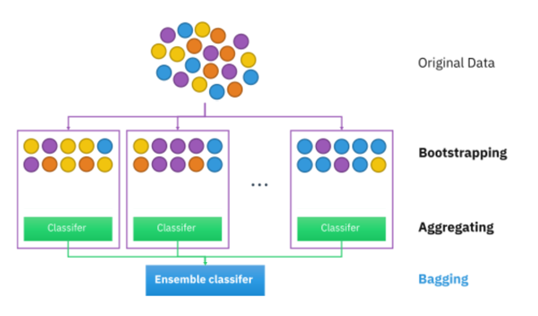

In [27]:
rf_model = RandomForestClassifier(n_estimators= 300,max_depth= 20,min_samples_split= 2,random_state=1)
rf_model.fit(X_train, y_train)
print(f'Model Accuracy for train data: {rf_model.score(X_train, y_train)}')
print(f'Model Accuracy for test data: {rf_model.score(X_test, y_test)}')

Model Accuracy for train data: 0.9435968562182154
Model Accuracy for test data: 0.8952939590075513


In [10]:
# Instantiate the base estimator ("weak" model)
clf_dt = DecisionTreeClassifier(max_depth=)

In [11]:
lr=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True)

In [12]:
# Build the Bagging classifier with 5 estimators
clf_bag =ensemble.BaggingClassifier(
base_estimator=clf_dt,
n_estimators=300
)
clf_bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=20,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
  

In [13]:
print(f'Model Accuracy for train data: {clf_bag.score(X_train, y_train)}')
print(f'Model Accuracy for test data: {clf_bag.score(X_test, y_test)}')

Model Accuracy for train data: 0.9545769764216366
Model Accuracy for test data: 0.9004180151024811


# BOOSTING
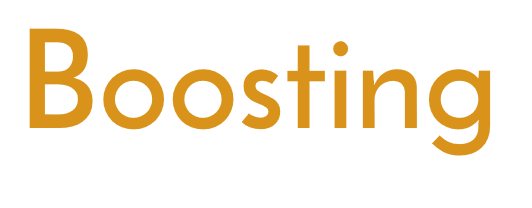

In [14]:
# Instantiate the base estimator ("weak" model)
clf_dt = DecisionTreeClassifier(max_depth=20)

In [15]:
clf_ada = ensemble.AdaBoostClassifier(
base_estimator=clf_dt,
n_estimators=300,
learning_rate=0.9
)

clf_ada.fit(X_train,y_train)
print(f'Model Accuracy for train data: {clf_ada.score(X_train, y_train)}')
print(f'Model Accuracy for test data: {clf_ada.score(X_test, y_test)}')

Model Accuracy for train data: 0.9808714748035137
Model Accuracy for test data: 0.9064859762675297
